Importando bibliotecas

In [1]:
import math  
import numpy as np                                                       
import pandas as pd
import seaborn as sns
from google.colab import drive
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importando base unificada das notas dos estudantes da disciplina de programação
df_programacao = pd.read_excel('/content/drive/MyDrive/8 Periodo/TCC/Bases/Fundamentos_Programacão.xlsx')

# Importando base unificada das notas dos estudantes da disciplina de matemática
df_matematica = pd.read_excel('/content/drive/MyDrive/8 Periodo/TCC/Bases/Matemática_Computação.xlsx')

# Importando base unificada das notas dos estudantes da disciplina de lógica
df_logica = pd.read_excel('/content/drive/MyDrive/8 Periodo/TCC/Bases/Lógica_Matemática.xlsx')



# **Tratamento dos Dados**

Transformando os valores das colunas 'Ano', 'Aluno', 'Faltas' e 'Período' 

In [4]:
# Tratando a coluna Ano
df_programacao['Ano'] = pd.to_numeric(df_programacao['Ano'], downcast='integer')
df_matematica['Ano'] = pd.to_numeric(df_matematica['Ano'], downcast='integer')
df_logica['Ano'] = pd.to_numeric(df_logica['Ano'], downcast='integer')

# Tratando a coluna Aluno
df_programacao['Aluno'] = pd.to_numeric(df_programacao['Aluno'], downcast='integer')
df_matematica['Aluno'] = pd.to_numeric(df_matematica['Aluno'], downcast='integer')
df_logica['Aluno'] = pd.to_numeric(df_logica['Aluno'], downcast='integer')

# Tratando a coluna Faltas
df_programacao['Faltas'] = pd.to_numeric(df_programacao['Faltas'], downcast='integer')
df_matematica['Faltas'] = pd.to_numeric(df_matematica['Faltas'], downcast='integer')
df_logica['Faltas'] = pd.to_numeric(df_logica['Faltas'], downcast='integer')

# Tratando a coluna Período
df_programacao['Período'] = pd.to_numeric(df_programacao['Período'], downcast='integer')
df_matematica['Período'] = pd.to_numeric(df_matematica['Período'], downcast='integer')
df_logica['Período'] = pd.to_numeric(df_logica['Período'], downcast='integer')

Removendo espaços indesejáveis dos valores da coluna de 'Situação'

In [5]:
df_programacao['Situação'] = df_programacao['Situação'].str.strip()
df_matematica['Situação'] = df_matematica['Situação'].str.strip()
df_logica['Situação'] = df_logica['Situação'].str.strip()

Unificando as bases

In [6]:
# Adiciona coluna de disciplina em cada base para realizar a unificação
df_programacao_coluna = df_programacao.assign(Disciplina='Programação')
df_matematica_coluna = df_matematica.assign(Disciplina='Matemática')
df_logica_coluna = df_logica.assign(Disciplina='Lógica')

# merge entre as bases
df_merge_prog_mat = pd.merge(df_programacao_coluna, df_matematica_coluna, how = 'outer')
df_disciplinas_unificadas_PreExclusao = pd.merge(df_merge_prog_mat, df_logica_coluna, how = 'outer')

In [7]:
# Remove aprovados que estão com média abaixo de 5
index_names_mat = df_matematica[ (df_matematica['Média'] <=4.9) & (df_matematica['Situação'] == 'Aprovado')].index
df_matematica_coluna.drop(index_names_mat, inplace = True)
print("Index que serão excluídos do df_matematica", index_names_mat)

# Remove aprovados que estão com média abaixo de 5
index_names_log = df_logica[ (df_logica['Média'] <=4.9) & (df_logica['Situação'] == 'Aprovado')].index
df_logica_coluna.drop(index_names_log, inplace = True)
print("Index que serão excluídos do df_logica", index_names_log)

# Remove aprovados que estão com média abaixo de 5
index_names_pro = df_programacao[ (df_programacao['Média'] <=4.9) & (df_programacao['Situação'] == 'Aprovado')].index
df_programacao_coluna.drop(index_names_pro, inplace = True)
print("Index que serão excluídos do df_programacao", index_names_pro)

Index que serão excluídos do df_matematica Int64Index([30, 42], dtype='int64')
Index que serão excluídos do df_logica Int64Index([72, 74], dtype='int64')
Index que serão excluídos do df_programacao Int64Index([], dtype='int64')


In [8]:
# Filtrando apenas os alunos que cursaram e não possuem nota 0.0
## Verificamos que alguns casos dos alunos reprovados por nota veio com média vazia. Foi verificado na base que não possuí alunos com média 0.0
### Como tratamento (no Excel) dos valores nulos, definimos essas médias como 0.0.

# Realizamos os filtros nas bases remover alunos que cancelaram ou trancaram curso, além de remover as médias 0.0 (casos das médias nulas)
df_cursaram_prog = df_programacao_coluna[(df_programacao_coluna.Média != 0) & (df_programacao_coluna.Situação != 'Trancado') & (df_programacao_coluna.Situação != 'Cancelado')] 
df_cursaram_mat = df_matematica_coluna[(df_matematica_coluna.Média != 0) & (df_matematica_coluna.Situação != 'Trancado') & (df_matematica_coluna.Situação != 'Cancelado')] 
df_cursaram_log = df_logica_coluna[(df_logica_coluna.Média != 0) & (df_logica_coluna.Situação != 'Trancado') & (df_logica_coluna.Situação != 'Cancelado')] 

# Unificação das bases tratadas
df_prog_mat = pd.merge(df_cursaram_prog, df_cursaram_mat, how = 'outer')
df_base_unificada_tratada= pd.merge(df_prog_mat, df_cursaram_log, how = 'outer')


#**Taxa de Aprovação / Reprovação**

In [9]:
# Procentagem da distribuição da situação final dos alunos na cadeira de programação (2018 - 2022.1)
df_tx_Programacao = df_programacao_coluna.mask(df_programacao == 'Rep Nota', 'Reprovado')
df_tx_Programacao = df_tx_Programacao.mask(df_programacao == 'Rep Freq', 'Reprovado')
df_tx_Programacao = df_tx_Programacao.query('Situação != "Cancelado" and Situação != "Trancado"')['Situação']
df_tx_Programacao = pd.DataFrame(round(df_tx_Programacao.value_counts(normalize = True)*100, 2))

# Procentagem da distribuição da situação final dos alunos na cadeira de Matemática (2018 - 2022.1)
df_tx_Matematica = df_matematica_coluna.mask(df_matematica == 'Rep Nota', 'Reprovado')
df_tx_Matematica = df_tx_Matematica.mask(df_matematica == 'Rep Freq', 'Reprovado')
df_tx_Matematica = df_tx_Matematica.query('Situação != "Cancelado" and Situação != "Trancado"')['Situação']
df_tx_Matematica = pd.DataFrame(round(df_tx_Matematica.value_counts(normalize = True)*100, 2))

# Procentagem da distribuição da situação final dos alunos na cadeira de Matemática (2018.2 - 2022.1)
df_tx_Logica = df_logica_coluna.mask(df_logica == 'Rep Nota', 'Reprovado')
df_tx_Logica = df_tx_Logica.mask(df_logica == 'Rep Freq', 'Reprovado')
df_tx_Logica = df_tx_Logica.query('Situação != "Cancelado" and Situação != "Trancado"')['Situação']
df_tx_Logica = pd.DataFrame(round(df_tx_Logica.value_counts(normalize = True)*100, 2))

# Faz o merge dos df's
df_tx_prog_mat= pd.merge(df_tx_Programacao.T, df_tx_Matematica.T, how = 'outer')
df_tx_prog_mat_log = pd.merge(df_tx_prog_mat, df_tx_Logica.T, how = 'outer')

#Renomeia os index e realiza o transpor
df_tx_situacao_Disciplinas = df_tx_prog_mat_log.T
df_tx_situacao_Disciplinas.rename(columns={0: 'Fundamentos de Programação', 1: 'Matemática para Computação',  2: 'Lógica Matemática para Computação'}, inplace=True)
df_tx_situacao_Disciplinas = df_tx_situacao_Disciplinas.T
df_tx_situacao_Disciplinas.sort_values('Aprovado', ascending=False)

,Aprovado,Reprovado
Lógica Matemática para Computação,87.36,12.64
Matemática para Computação,75.40,24.60
Fundamentos de Programação,71.43,28.57


# **Análise das médias das disciplinas**

<h1><b> Por Ano </b></h1>

In [10]:
# Calculando as médias das disciplinas por ano (2018 - 2022)

Media_Programacao_Ano = []
for x in range (2018, 2023):
  media = round(df_base_unificada_tratada.query('Disciplina == "Programação"')['Média'].loc[df_base_unificada_tratada['Ano']==x].mean(), 2)
  Media_Programacao_Ano.append(media)

Media_Matematica_Ano = []
for x in range (2018, 2023):
  media = round(df_base_unificada_tratada.query('Disciplina == "Matemática"')['Média'].loc[df_base_unificada_tratada['Ano']==x].mean(), 2)
  Media_Matematica_Ano.append(media)

Media_Logica_Ano = []
for x in range (2018, 2023):
  media = round(df_base_unificada_tratada.query('Disciplina == "Lógica"')['Média'].loc[df_base_unificada_tratada['Ano']==x].mean(), 2)
  Media_Logica_Ano.append(media)


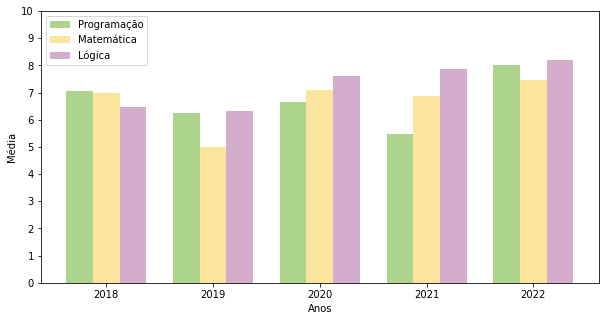

In [11]:
# Gera o gráfico de barras

barWidth = 0.25

plt.figure(figsize=(10,5))

r1 = np.arange(len(Media_Programacao_Ano))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, Media_Programacao_Ano, color = '#acd48c', width = barWidth, label = 'Programação')
plt.bar(r2, Media_Matematica_Ano, color = '#Fbe49c', width = barWidth, label = 'Matemática')
plt.bar(r3, Media_Logica_Ano, color = '#d4accc', width = barWidth, label = 'Lógica')

plt.xlabel('Anos')
plt.xticks([r + barWidth for r in range(len(Media_Programacao_Ano))], ['2018', '2019', '2020', '2021', '2022'])
plt.yticks(np.arange(0,11))
plt.ylabel("Média")

plt.legend()
plt.show()

<h1><b>Período Letivo</b></h1>

In [12]:
média_prog_periodo_letivo = []
media1 = df_base_unificada_tratada.query('Disciplina == "Programação"')['Média'].loc[df_base_unificada_tratada['Período_Letivo']==2018.1] .mean()
média_prog_periodo_letivo.append(media1)

media2 = df_base_unificada_tratada.query('Disciplina == "Programação"')['Média'].loc[df_base_unificada_tratada['Período_Letivo']==2019.1] .mean()
média_prog_periodo_letivo.append(media2)

media3 = df_base_unificada_tratada.query('Disciplina == "Programação"')['Média'].loc[df_base_unificada_tratada['Período_Letivo']==2020.1] .mean()
média_prog_periodo_letivo.append(media3)

media4 = df_base_unificada_tratada.query('Disciplina == "Programação"')['Média'].loc[df_base_unificada_tratada['Período_Letivo']==2021.1] .mean()
média_prog_periodo_letivo.append(media4)

media5 = df_base_unificada_tratada.query('Disciplina == "Programação"')['Média'].loc[df_base_unificada_tratada['Período_Letivo']==2022.1] .mean()
média_prog_periodo_letivo.append(media5)

média_matematica_periodo_letivo = []
media1 = df_base_unificada_tratada.query('Disciplina == "Matemática"')['Média'].loc[df_base_unificada_tratada['Período_Letivo']==2018.1] .mean()
média_matematica_periodo_letivo.append(media1)

media2 = df_base_unificada_tratada.query('Disciplina == "Matemática"')['Média'].loc[df_base_unificada_tratada['Período_Letivo']==2019.1] .mean()
média_matematica_periodo_letivo.append(media2)

media3 = df_base_unificada_tratada.query('Disciplina == "Matemática"')['Média'].loc[df_base_unificada_tratada['Período_Letivo']==2020.1] .mean()
média_matematica_periodo_letivo.append(media3)

media4 = df_base_unificada_tratada.query('Disciplina == "Matemática"')['Média'].loc[df_base_unificada_tratada['Período_Letivo']==2021.1] .mean()
média_matematica_periodo_letivo.append(media4)

media5 = df_base_unificada_tratada.query('Disciplina == "Matemática"')['Média'].loc[df_base_unificada_tratada['Período_Letivo']==2022.1] .mean()
média_matematica_periodo_letivo.append(media5)


média_log_periodo_letivo = []
media1 = df_base_unificada_tratada.query('Disciplina == "Lógica"')['Média'].loc[df_base_unificada_tratada['Período_Letivo']==2018.1] .mean()
média_log_periodo_letivo.append(media1)

media2 = df_base_unificada_tratada.query('Disciplina == "Lógica"')['Média'].loc[df_base_unificada_tratada['Período_Letivo']==2019.1] .mean()
média_log_periodo_letivo.append(media2)

media3 = df_base_unificada_tratada.query('Disciplina == "Lógica"')['Média'].loc[df_base_unificada_tratada['Período_Letivo']==2020.1] .mean()
média_log_periodo_letivo.append(media3)

media4 = df_base_unificada_tratada.query('Disciplina == "Lógica"')['Média'].loc[df_base_unificada_tratada['Período_Letivo']==2021.1] .mean()
média_log_periodo_letivo.append(media4)

media5 = df_base_unificada_tratada.query('Disciplina == "Lógica"')['Média'].loc[df_base_unificada_tratada['Período_Letivo']==2022.1] .mean()
média_log_periodo_letivo.append(media5)

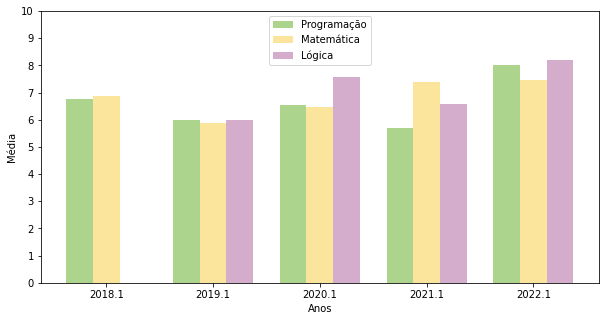

In [13]:
# Gera o gráfico de barras

barWidth = 0.25

plt.figure(figsize=(10,5))

r1 = np.arange(len(média_prog_periodo_letivo))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, média_prog_periodo_letivo, color = '#acd48c', width = barWidth, label = 'Programação')
plt.bar(r2, média_matematica_periodo_letivo, color = '#Fbe49c', width = barWidth, label = 'Matemática')
plt.bar(r3, média_log_periodo_letivo, color = '#d4accc', width = barWidth, label = 'Lógica')

plt.xlabel('Anos')
plt.xticks([r + barWidth for r in range(len(média_prog_periodo_letivo))], ['2018.1', '2019.1', '2020.1', '2021.1', '2022.1'])
plt.yticks(np.arange(0,11))
plt.ylabel("Média")

plt.legend()
plt.show()

<h1><b> Média Geral por disciplina </b></h1>

In [14]:
# Média geral dos estudantes por disciplina (Aprovados + Reprovados)

dicionário = {
    'Média Geral': [round(df_base_unificada_tratada['Média'].loc[df_base_unificada_tratada['Disciplina']=="Programação"].mean(),2), round(df_base_unificada_tratada['Média'].loc[df_base_unificada_tratada['Disciplina']=="Matemática"].mean(),2), round(df_base_unificada_tratada['Média'].loc[df_base_unificada_tratada['Disciplina']=="Lógica"].mean(),2)]
}
df_geral = pd.DataFrame(dicionário)
df1_geral = df_geral.T
df1_geral  = df1_geral.rename(columns={0 : 'Programação', 1 : 'Matemática ', 2 : 'Lógica'})



df1_geral

,Programação,Matemática,Lógica
Média Geral,6.47,6.63,7.39


In [15]:
# Cálculo do desvio padrão geral das disciplinas
desvio_padrao_geral = [round(df_base_unificada_tratada['Média'].loc[df_base_unificada_tratada['Disciplina']=="Programação"].std(),2), round(df_base_unificada_tratada['Média'].loc[df_base_unificada_tratada['Disciplina']=="Matemática"].std(),2), round(df_base_unificada_tratada['Média'].loc[df_base_unificada_tratada['Disciplina']=="Lógica"].std(),2)]

dicionário = {
    'Desvio Padrão': desvio_padrao_geral
}
df = pd.DataFrame(dicionário)
df_dp_geral = df.T
df_dp_geral = df_dp_geral.rename(columns={0 : 'Programação', 1 : 'Matemática ', 2 : 'Lógica'})



df_dp_geral

,Programação,Matemática,Lógica
Desvio Padrão,2.7,2.54,2.04


In [16]:
df_media_std_geral= pd.merge(df1_geral, df_dp_geral, how = 'outer')
df_media_std_geral = df_media_std_geral.rename(index={0 : "Média (Geral)", 1 : "Desvio Padrão (Geral)"})
df_media_std_geral

,Programação,Matemática,Lógica
Média (Geral),6.47,6.63,7.39
Desvio Padrão (Geral),2.70,2.54,2.04


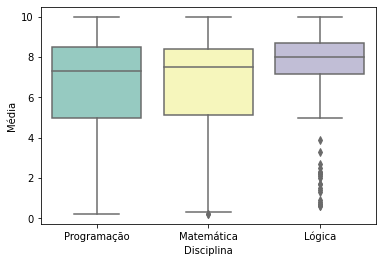

In [17]:
# Box plot médias gerais disciplinas
ax = sns.boxplot( x = "Disciplina", y = "Média",data = df_base_unificada_tratada, palette = "Set3")

<h1><b> Média dos reprovados por disciplina

In [18]:
# Calculando as médias dos reprovados nas disciplinas por Ano (2018-2022)

média_rep_prog = []
for x in range (2018, 2023):
  media = df_base_unificada_tratada.query('Disciplina == "Programação" & Situação == "Rep Nota"')['Média'].loc[df_base_unificada_tratada['Ano']==x] .mean()
  média_rep_prog.append(media)

média_rep_matematica = []
for x in range (2018, 2023):
  media = df_base_unificada_tratada.query('Disciplina == "Matemática" & Situação == "Rep Nota"')['Média'].loc[df_base_unificada_tratada['Ano']==x] .mean()
  média_rep_matematica.append(media)

média_rep_log = []
for x in range (2018, 2023):
  media = df_base_unificada_tratada.query('Disciplina == "Lógica" & Situação == "Rep Nota"')['Média'].loc[df_base_unificada_tratada['Ano']==x] .mean()
  média_rep_log.append(media)

In [19]:
# Cálculo da média geral dos reprovados por disciplina (2019-2022)

media_reprovados = [round(df_base_unificada_tratada.query('Disciplina == "Programação" & Situação == "Rep Nota" & Ano != 2018')['Média'].loc[df_base_unificada_tratada['Disciplina']=="Programação"].mean(),2), round(df_base_unificada_tratada.query('Disciplina == "Matemática" & Situação == "Rep Nota" & Ano != 2018')['Média'].loc[df_base_unificada_tratada['Disciplina']=="Matemática"].mean(),2), round(df_base_unificada_tratada.query('Disciplina == "Lógica" & Situação == "Rep Nota" & Ano != 2018')['Média'].loc[df_base_unificada_tratada['Disciplina']=="Lógica"].mean(),2)]

dicionário = {
    'Média Geral (Reprovados) ': media_reprovados
}
df_reprov= pd.DataFrame(dicionário)
df_Media_Reprovado = df_reprov.T
df_Media_Reprovado = df_Media_Reprovado.rename(columns={0 : 'Programação', 1 : 'Matemática ', 2 : 'Lógica'})



df_Media_Reprovado

,Programação,Matemática,Lógica
Média Geral (Reprovados),2.35,2.25,1.84


In [20]:
dp_reprovado = [round(df_base_unificada_tratada.query('Disciplina == "Programação" & Situação == "Rep Nota" & Ano != 2018')['Média'].loc[df_base_unificada_tratada['Disciplina']=="Programação"].std(),2), round(df_base_unificada_tratada.query('Disciplina == "Matemática" & Situação == "Rep Nota" & Ano != 2018')['Média'].loc[df_base_unificada_tratada['Disciplina']=="Matemática"].std(),2), round(df_base_unificada_tratada.query('Disciplina == "Lógica" & Situação == "Rep Nota" & Ano != 2018')['Média'].loc[df_base_unificada_tratada['Disciplina']=="Lógica"].std(),2)]

dicionário = {
    'Desvio Padrão (Reprovados)': dp_reprovado
}
df = pd.DataFrame(dicionário)
df_dp_reprovado = df.T
df_dp_reprovado = df_dp_reprovado.rename(columns={0 : 'Programação', 1 : 'Matemática ', 2 : 'Lógica'})



df_dp_reprovado

,Programação,Matemática,Lógica
Desvio Padrão (Reprovados),1.29,1.19,0.94


In [21]:
df_media_std_rep= pd.merge(df_Media_Reprovado, df_dp_reprovado, how = 'outer')
df_media_std_rep = df_media_std_rep.rename(index={0 : "Média Geral (Reprovados)", 1 : "Desvio Padrão (Reprovados)"})
df_media_std_rep

,Programação,Matemática,Lógica
Média Geral (Reprovados),2.35,2.25,1.84
Desvio Padrão (Reprovados),1.29,1.19,0.94


<h1><b>Média dos aprovados por disciplinas

In [22]:
# Média dos alunos aprovados nas disciplinas segmentado por ano

média_aprov_prog = []
for x in range (2018, 2023):
  media = df_base_unificada_tratada.query('Disciplina == "Programação" & Situação == "Aprovado"')['Média'].loc[df_base_unificada_tratada['Ano']==x] .mean()
  média_aprov_prog.append(media)

média_aprov_matematica = []
for x in range (2018, 2023):
  media = df_base_unificada_tratada.query('Disciplina == "Matemática" & Situação == "Aprovado"')['Média'].loc[df_base_unificada_tratada['Ano']==x] .mean()
  média_aprov_matematica.append(media)

média_aprov_log = []
for x in range (2018, 2023):
  media = df_base_unificada_tratada.query('Disciplina == "Lógica" & Situação == "Aprovado"')['Média'].loc[df_base_unificada_tratada['Ano']==x] .mean()
  média_aprov_log.append(media)





In [23]:
# Média geral dos estudantes aprovados por disciplina 

media_aprovados = [round(df_base_unificada_tratada.query('Disciplina == "Programação" & Situação == "Aprovado" & Ano != 2018')['Média'].loc[df_base_unificada_tratada['Disciplina']=="Programação"].mean(),2), round(df_base_unificada_tratada.query('Disciplina == "Matemática" & Situação == "Aprovado" & Ano != 2018')['Média'].loc[df_base_unificada_tratada['Disciplina']=="Matemática"].mean(),2), round(df_base_unificada_tratada.query('Disciplina == "Lógica" & Situação == "Aprovado" & Ano != 2018')['Média'].loc[df_base_unificada_tratada['Disciplina']=="Lógica"].mean(),2)]

desvio_padrao_prog_aprov = df_base_unificada_tratada.query('Disciplina == "Programação" & Situação == "Aprovado" & Ano != 2018')['Média'].loc[df_base_unificada_tratada['Disciplina']=="Programação"].std()
desvio_padrao_mat_aprov =df_base_unificada_tratada.query('Disciplina == "Matemática" & Situação == "Aprovado" & Ano != 2018')['Média'].loc[df_base_unificada_tratada['Disciplina']=="Matemática"].std()
desvio_padrao_log_aprov = df_base_unificada_tratada.query('Disciplina == "Lógica" & Situação == "Aprovado" & Ano != 2018')['Média'].loc[df_base_unificada_tratada['Disciplina']=="Lógica"].std()


dicionário = {
    'Média Geral (Aprovados)': media_aprovados
}
df = pd.DataFrame(dicionário)
df_media_aprov = df.T
df_media_aprov = df_media_aprov.rename(columns={0 : 'Programação', 1 : 'Matemática ', 2 : 'Lógica'})



df_media_aprov

,Programação,Matemática,Lógica
Média Geral (Aprovados),7.93,7.79,7.97


In [24]:
desvio_padrao_aprovados = [round(df_base_unificada_tratada.query('Disciplina == "Programação" & Situação == "Aprovado" & Ano != 2018')['Média'].loc[df_base_unificada_tratada['Disciplina']=="Programação"].std(),2), round(df_base_unificada_tratada.query('Disciplina == "Matemática" & Situação == "Aprovado" & Ano != 2018')['Média'].loc[df_base_unificada_tratada['Disciplina']=="Matemática"].std(),2), round(df_base_unificada_tratada.query('Disciplina == "Lógica" & Situação == "Aprovado" & Ano != 2018')['Média'].loc[df_base_unificada_tratada['Disciplina']=="Lógica"].std(),2)]

dicionário = {
    'Desvio Padrão (Aprovados)': desvio_padrao_aprovados
}
df = pd.DataFrame(dicionário)
df_dp_aprovado = df.T
df_dp_aprovado = df_dp_aprovado.rename(columns={0 : 'Programação', 1 : 'Matemática ', 2 : 'Lógica'})



df_dp_aprovado

,Programação,Matemática,Lógica
Desvio Padrão (Aprovados),1.28,1.31,1.13


In [25]:
df_media_std_aprov= pd.merge(df_media_aprov, df_dp_aprovado, how = 'outer')
df_media_std_aprov = df_media_std_aprov.rename(index={0 : "Média Geral (Aprovados)", 1 : "Desvio Padrão (Aprovados)"})
df_media_std_aprov

,Programação,Matemática,Lógica
Média Geral (Aprovados),7.93,7.79,7.97
Desvio Padrão (Aprovados),1.28,1.31,1.13


<Figure size 720x576 with 0 Axes>

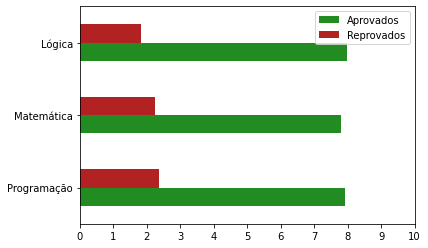

In [37]:


plt.figure(figsize=(10,8))

# Create a sample dataframe
df = pd.DataFrame({'Aprovados': media_aprovados,
                  'Reprovados': media_reprovados},
                  index=['Programação', 'Matemática', 'Lógica'])

  
# Plot grouped horizontal bar chart
df.plot.barh(
             color={"forestgreen", "firebrick"})

plt.xticks(np.arange(0,11))

plt.show()

# **Tamanho Amostral do Questionário**

In [27]:
# desconsidera os alunos com situação 'Trancado' e 'Cancelado'
Alunos_cursaram = df_disciplinas_unificadas_PreExclusao[(df_disciplinas_unificadas_PreExclusao.Situação != 'Trancado') & (df_disciplinas_unificadas_PreExclusao.Situação != 'Cancelado')]
Volumetria_Alunos_cursaram= len(pd.unique(Alunos_cursaram['Aluno']))


print("Alunos distintos que cursaram as disciplinas: ", Volumetria_Alunos_cursaram)

Alunos distintos que cursaram as disciplinas:  405


In [28]:
# Cálculo tamanho amostral desejável para o questionário

N_ = Volumetria_Alunos_cursaram       # -> tam. amostra
z_ = 1.96                             # -> score Z
e_ = 0.05                             # -> margem de erro
p_ = 0.5                              # -> desvio padrão


def Tamanho_Amostra_Questionario(N, z, e, p):

    n = (z**2 * p*(1-p))/e**2 / (1 + (z**2 * p*(1-p)/(e**2 * N)))

    return (math.ceil(n))

print(Tamanho_Amostra_Questionario(N_,z_,e_,p_))

198
